In [1]:
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ["CUDA_VISIBLE_DEVICES"] = "0" 

import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
# import tensorflow as tf
from tensorflow.keras.models import load_model
from skimage import metrics

import matplotlib.transforms as transforms
from math import pi

In [2]:
path = os.path.abspath("..")

X_val = np.load(path+"/train_test_data/X_val.npy")
y_val = np.load (path+"/train_test_data/y_val.npy")

X_val.shape, y_val.shape

((137, 17, 64, 64, 3), (137, 17, 64, 64, 1))

In [3]:
model = load_model(path+"/lstm_model_2.h5")
history = np.load(path+"/history_2.npy", allow_pickle=True).item()

In [4]:
def scale_array(arr):
    arr_min = np.min(arr)  ## Flattens the array and finds the min value inside it
    arr_max = np.max(arr)  ## Flattens the array and finds the max value inside it
    scaled_array = (arr - arr_min) / (arr_max - arr_min) * 255
    scaled_array = scaled_array.astype(np.uint8)
    
    return scaled_array

In [5]:
GT_array = y_val
a, b, c, d, e = y_val.shape[0], y_val.shape[1], y_val.shape[2], y_val.shape[3], y_val.shape[4] 
PD_array = np.zeros((a, b, c, d, e))   ## Predicted arrays

for i in range(X_val.shape[0]):
    frames = X_val[i]   ## taking 1 validation video sample at one time
    PD_array[i] = model.predict(np.expand_dims(frames, axis=0), verbose=0, workers=10, use_multiprocessing=True)

GT_scaled = scale_array(y_val)
PD_scaled = scale_array(PD_array)

GT_array.shape, PD_array.shape

((137, 17, 64, 64, 1), (137, 17, 64, 64, 1))

In [6]:
X_g1 = np.delete(np.concatenate((X_val, PD_array), axis=-1), 0, axis=-1)
X_g1 = np.delete(X_g1, -1, axis=1)
y_g1 = np.delete(y_val, 0, axis=1)

a, b, c, d, e = y_g1.shape[0], y_g1.shape[1], y_g1.shape[2], y_g1.shape[3], y_g1.shape[4] 
PD_G1 = np.zeros((a, b, c, d, e))   ## Predicted arrays
for i in range(X_g1.shape[0]):
    frames = X_g1[i]   ## taking 1 validation video sample at one time
    PD_G1[i] = model.predict(np.expand_dims(frames, axis=0), verbose=0, workers=10, use_multiprocessing=True)

y_g1_scaled = scale_array(y_g1)
PD_G1_scaled = scale_array(PD_G1)

y_g1.shape, PD_G1.shape

((137, 16, 64, 64, 1), (137, 16, 64, 64, 1))

In [7]:
X_g2 = np.delete(np.concatenate((X_g1, PD_G1), axis=-1), 0, axis=-1)
X_g2 = np.delete(X_g2, -1, axis=1)
y_g2 = np.delete(y_g1, 0, axis=1)

a, b, c, d, e = y_g2.shape[0], y_g2.shape[1], y_g2.shape[2], y_g2.shape[3], y_g2.shape[4] 
PD_G2 = np.zeros((a, b, c, d, e))   ## Predicted arrays

for i in range(X_g1.shape[0]):
    frames = X_g2[i]   ## taking 1 validation video sample at one time
    PD_G2[i] = model.predict(np.expand_dims(frames, axis=0), verbose=0, workers=10, use_multiprocessing=True)

y_g2_scaled = scale_array(y_g2)
PD_G2_scaled = scale_array(PD_G2)

y_g2.shape, PD_G2.shape

((137, 15, 64, 64, 1), (137, 15, 64, 64, 1))

In [8]:
X_g3 = np.delete(np.concatenate((X_g2, PD_G2), axis=-1), 0, axis=-1)
X_g3 = np.delete(X_g3, -1, axis=1)
y_g3 = np.delete(y_g2, 0, axis=1)

a, b, c, d, e = y_g3.shape[0], y_g3.shape[1], y_g3.shape[2], y_g3.shape[3], y_g3.shape[4] 
PD_G3 = np.zeros((a, b, c, d, e))   ## Predicted arrays

for i in range(X_g2.shape[0]):
    frames = X_g3[i]   ## taking 1 validation video sample at one time
    PD_G3[i] = model.predict(np.expand_dims(frames, axis=0), verbose=0, workers=10, use_multiprocessing=True)

y_g3_scaled = scale_array(y_g3)
PD_G3_scaled = scale_array(PD_G3)

y_g3.shape, PD_G3.shape

((137, 14, 64, 64, 1), (137, 14, 64, 64, 1))

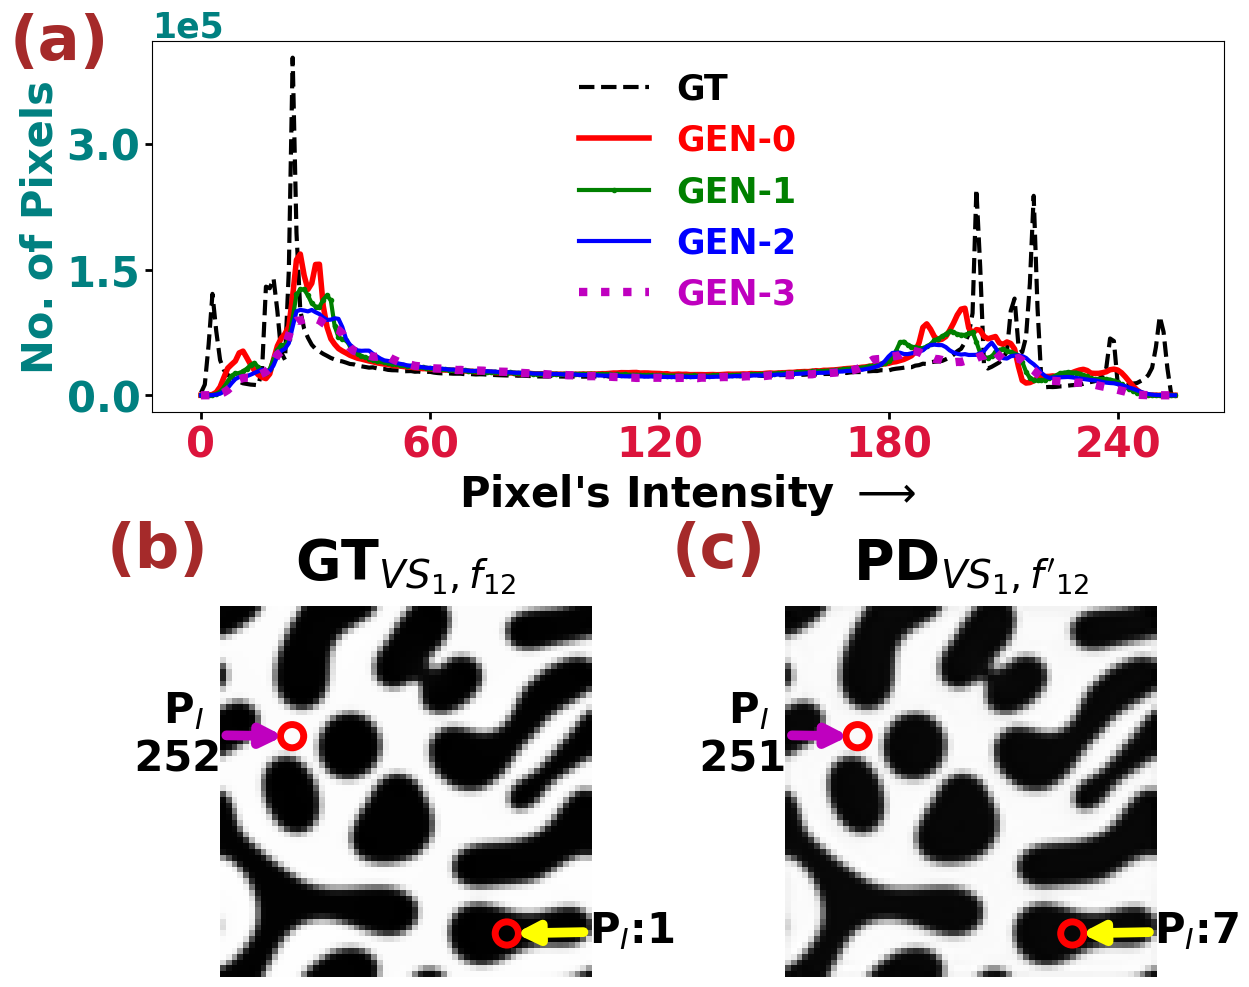

In [589]:
vs = 1
f = 12

pd_img = scale_array(PD_array[vs,f,:,:,0])
gt_img = scale_array(GT_array[vs,f,:,:,0])

pd_arr = scale_array(PD_array[:,:,:,:,0])
gt_arr = scale_array(GT_array[:,:,:,:,0])

from skimage.exposure import histogram

hist_gt, hist_centers_gt = histogram(GT_scaled)
hist_g0, hist_centers_g0 = histogram(PD_scaled)
hist_g1, hist_centers_g1 = histogram(PD_G1_scaled)
hist_g2, hist_centers_g2 = histogram(PD_G2_scaled)
hist_g3, hist_centers_g3 = histogram(PD_G3_scaled)

fig = plt.figure(figsize=(12.5, 10)) 
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1)


ax1 = fig.add_subplot(2, 1, 1) # column 1 and 2, row 1
ax2 = fig.add_subplot(2, 2, 3) # column 1, row 2
ax3 = fig.add_subplot(2, 2, 4) # column 2, row 2


ax1.plot(hist_centers_gt, hist_gt, '--',  lw=3, color='black', label='GT')
ax1.plot(hist_centers_g0, hist_g0,  lw=4, color="red", label='GEN-0')
ax1.plot(hist_centers_g1, hist_g1, 'o-', markersize=3, lw=3, color="green", label='GEN-1')
ax1.plot(hist_centers_g2, hist_g2, lw=3, color="blue", label='GEN-2')
ax1.plot(hist_centers_g3, hist_g3, ':', lw=6, color="m", label='GEN-3')

ax1.set_ylabel(r"No. of Pixels", color='teal', size= 30, weight = 'bold')
ax1.set_xlabel("Pixel's Intensity $\longrightarrow$", size= 30, weight = 'bold')
# ax1.legend(loc=(0.01,0.9), ncols=5, prop={'weight':'bold', 'size':'14'}, labelcolor='linecolor', frameon=False)
ax1.legend(loc=9, ncols=1, prop={'weight':'bold', 'size':'25'}, labelcolor='linecolor', frameon=False)

ax1.tick_params(axis='y', labelcolor='teal', labelsize=30, length=5, width=2, )
ax1.yaxis.set_major_locator(plt.MaxNLocator(4))
ax1.yaxis.offsetText.set_fontsize(25)
ax1.yaxis.offsetText.set_weight('bold')
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0,0),useMathText=False, )

ax1.tick_params(axis='x', labelcolor='crimson', labelsize=30, length=5, width=2, )
ax1.xaxis.set_major_locator(plt.MaxNLocator(5))

for label in ax1.get_yticklabels(): label.set_fontweight('bold')
for label in ax1.get_xticklabels(): label.set_fontweight('bold')


ax2.imshow(gt_img, cmap='gray')

x1 = 0.2
y1 = 0.35

x2 = 0.78
y2 = 0.88

height, width = gt_img.shape[:2] 
pixel_x1 = int(x1 * width)
pixel_y1 = int(y1 * height)
pixel_x2 = int(x2 * width)
pixel_y2 = int(y2 * height)

pixel_value1 = gt_img[pixel_y1, pixel_x1]
pixel_value2 = gt_img[pixel_y2, pixel_x2]

radius = 2
center1 = (pixel_x1, pixel_y1)
center2 = (pixel_x2, pixel_y2)

circle1 = Circle(center1, radius, linestyle='-', linewidth=5, edgecolor='red', facecolor='none')
circle2 = Circle(center2, radius, linestyle='-', linewidth=5, edgecolor='red', facecolor='none')

ax2.add_patch(circle1)
ax2.add_patch(circle2)


angle1 = np.arctan2(pixel_y1 - center1[1], pixel_x1 - center1[0])
angle2 = np.arctan2(pixel_y2 - center2[1], pixel_x2 - center2[0])

start_x1 = center1[0] + radius * np.cos(angle1)
start_y1 = center1[1] + radius * np.sin(angle1)
start_x2 = center2[0] + radius * np.cos(angle2)
start_y2 = center2[1] + radius * np.sin(angle2)

# ax.plot(pixel_x, pixel_y, 'o', markersize=5)
ax2.annotate(f'   P$_I$\n {pixel_value1}', (pixel_x1-1, pixel_y1),
             xytext=(-120, -25), textcoords='offset points', fontsize=30, weight = 'bold', color = 'black',
             arrowprops=dict(arrowstyle="-|>", linewidth=7, connectionstyle="arc3,rad=0", color='m',)
           )

ax2.annotate(f'P$_I$:{pixel_value2}', (pixel_x2+1, pixel_y2),
             xytext=(55, -7), textcoords='offset points', fontsize=30, weight = 'bold',
             arrowprops=dict(arrowstyle="-|>", linewidth=7, connectionstyle="arc3,rad=-0", color='yellow',)
           )

ax3.imshow(pd_img, cmap='gray')

x1 = 0.2
y1 = 0.35

x2 = 0.78
y2 = 0.88

height, width = pd_img.shape[:2] 
pixel_x1 = int(x1 * width)
pixel_y1 = int(y1 * height)
pixel_x2 = int(x2 * width)
pixel_y2 = int(y2 * height)

pixel_value1 = pd_img[pixel_y1, pixel_x1]
pixel_value2 = pd_img[pixel_y2, pixel_x2]

radius = 2
center1 = (pixel_x1, pixel_y1)
center2 = (pixel_x2, pixel_y2)

circle1 = Circle(center1, radius, linestyle='-', linewidth=5, edgecolor='red', facecolor='none')
circle2 = Circle(center2, radius, linestyle='-', linewidth=5, edgecolor='red', facecolor='none')

ax3.add_patch(circle1)
ax3.add_patch(circle2)


angle1 = np.arctan2(pixel_y1 - center1[1], pixel_x1 - center1[0])
angle2 = np.arctan2(pixel_y2 - center2[1], pixel_x2 - center2[0])

start_x1 = center1[0] + radius * np.cos(angle1)
start_y1 = center1[1] + radius * np.sin(angle1)
start_x2 = center2[0] + radius * np.cos(angle2)
start_y2 = center2[1] + radius * np.sin(angle2)

# ax.plot(pixel_x, pixel_y, 'o', markersize=5)
ax3.annotate(f'   P$_I$\n {pixel_value1}', (pixel_x1-1, pixel_y1),
             xytext=(-120, -25), textcoords='offset points', fontsize=30, weight = 'bold', color = 'black',
             arrowprops=dict(arrowstyle="-|>", linewidth=7, connectionstyle="arc3,rad=0", color='m',)
           )

ax3.annotate(f'P$_I$:{pixel_value2}', (pixel_x2+1, pixel_y2),
             xytext=(55, -7), textcoords='offset points', fontsize=30, weight = 'bold',
             arrowprops=dict(arrowstyle="-|>", linewidth=7, connectionstyle="arc3,rad=-0", color='yellow',)
           )

# plt.subplots_adjust(hspace=0.2)

ax2.axis('off')
ax2.set_title(r'GT$_{VS_1, f_{12}}$', fontsize=40, weight='bold', pad=20)

ax3.axis('off')
ax3.set_title(r"PD$_{VS_1, f'_{12}}$", fontsize=40, weight='bold', pad=20)


ax1.text(-50, 4e5, s="(a)", fontsize=45, weight = 'bold', color='brown')
ax2.text(-20, -7, "(b)", fontsize=45, weight = 'bold', color='brown')
ax3.text(-20, -7, "(c)", fontsize=45, weight = 'bold', color='brown')

    


plt.tight_layout()
plt.savefig('figures/histogram.png', transparent=True)
plt.savefig("/home/upadesh/1 Research Project/PhD/0 My Research Papers/0 ConvLSTM/manuscript/figures/histogram.png", transparent=True)  ## For Manuscript


plt.show()